In [1]:
# Audrey D.
# Mar. 2020

# from spectrum2D import *
import matplotlib.pyplot as plt
import numpy as np
from scipy.fftpack import fftfreq, fft, fft2, fftshift
from scipy.signal import tukey, detrend

from scipy.interpolate import interp2d

import xarray as xr

In [2]:
omega = 2*np.pi/(36*86400)
kxkx = -2*np.pi/(720e3)

print('omega (cycle/s) = ',omega)
print('kx (cycle/m) = ',kxkx)
print('omega (/s) = ',omega/(2*np.pi))
print('kx (/m) = ',kxkx/(2*np.pi))


nt = 200
nx = 200
dx = 20e3
dt = 86400 * 4

tt = np.arange(0,nt)*dt
xx = np.arange(0,nx)*dx

vvv = np.ones((nt,nx))

for i in range(0,nt):
    vvv[i] = np.cos((kxkx*xx-omega*tt[i]))

omega (cycle/s) =  2.0200570046230667e-06
kx (cycle/m) =  -8.726646259971648e-06
omega (/s) =  3.2150205761316875e-07
kx (/m) =  -1.388888888888889e-06


In [3]:
def compute_2d_spectrum(F,nx,ny,dx,dy):
    """
    Compute 2d spectrum by using the 
    2d fast fourier transform
    """
    ### detrend
    Fdtr = detrend(detrend(F,axis=1),axis=0)

    ## Window Tapering
    cff_tukey = 0.5
    wdw_y = tukey(ny, cff_tukey)
    wdw_x = tukey(nx, cff_tukey)
    wdw = np.outer(wdw_x,wdw_y)
    Ftpr = Fdtr * wdw[:,:]

    ### spectre 2d
    Fsp = np.zeros(Ftpr.shape)
    ld = 1./dy * 1./dx * (wdw**2).sum()

    pu = fftshift(fft2(Ftpr))
    Fsp = (np.conjugate(pu)*pu).real/ ld

    ### Wavelength and period
    kx = fftshift(fftfreq(nx,dx))
    ky = fftshift(fftfreq(ny,dy))

    return kx, ky, Fsp


Fsp=[]

w, kx, Fsp = compute_2d_spectrum(vvv,nt,nx,dt,dx)

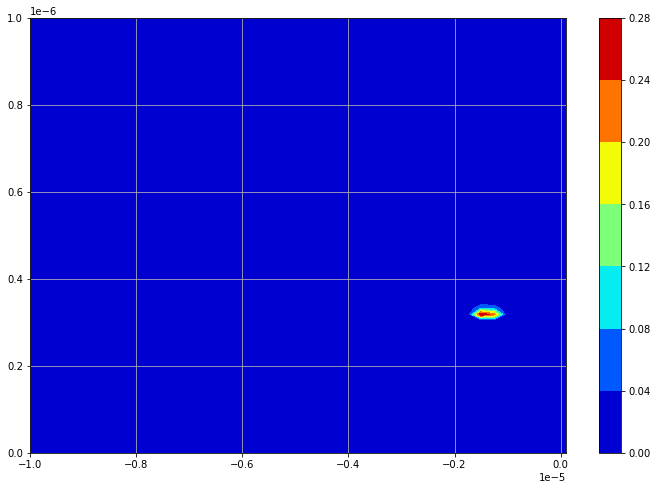

In [6]:
OMEGA,KX = np.meshgrid(w,kx)

plt.figure(figsize=(12,8))

ax = plt.subplot(111)
plt.grid('on')
    
cax = ax.contourf(-KX,OMEGA,Fsp.T*1e-14,cmap=plt.cm.jet)
cbar=plt.colorbar(cax)
    
ax.set_xlim(-1e-5,0.1e-6)
ax.set_ylim(-0.,1e-6)

plt.show()
plt.close()